## Chapter One

In [2]:
# loading 
from fastbook import *

### GPU Utilization

In [3]:
# checking for cuda driver
import torch

torch.cuda.is_available()

True

In [4]:
torch.cuda.current_device()

0

In [5]:
torch.cuda.device(0)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


### Image Classification

In [7]:
from fastai.vision.all import *

In [11]:
path = untar_data(URLs.PETS) / 'images'
path

Path('/storage/data/oxford-iiit-pet/images')

In [12]:
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

# instantiating cnn learner with resnet architecture (34 layers)
learn = cnn_learner(dls, resnet34, metrics=error_rate)

# only fine tuning last layer
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.179041,0.017158,0.006766,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.059046,0.010487,0.002030,00:26


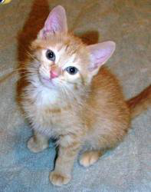

In [17]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [18]:
# uploading with widget
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [19]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000242


### Creating Diagrams

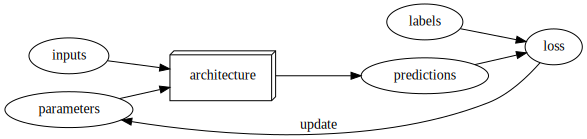

In [22]:
gv('''
ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; 
parameters->model; 
labels->loss; 
predictions->loss
loss->parameters[constraint=false label=update]
''')

### Image Segementation

In [25]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.643463,1.919998,00:01


epoch,train_loss,valid_loss,time
0,1.578608,1.342248,00:01
1,1.423852,1.236578,00:01
2,1.445130,1.440424,00:01
3,1.364007,1.044385,00:01
4,1.250775,0.901193,00:01
5,1.141207,0.795363,00:01
6,1.045998,0.770428,00:01
7,0.968982,0.755097,00:01


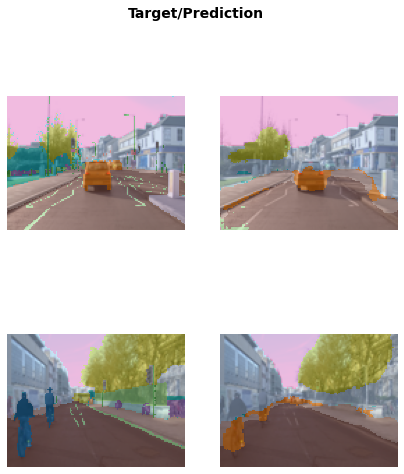

In [26]:
learn.show_results(max_n=6, figsize=(7,8))

### Text Classification

In [27]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

# fine tune last layer
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.621480,0.423079,0.805560,02:37


epoch,train_loss,valid_loss,accuracy,time
0,0.306887,0.250026,0.898920,04:54
1,0.211373,0.213029,0.912720,04:50
2,0.178879,0.196235,0.925320,04:54
3,0.154658,0.195918,0.925680,04:53


In [28]:
learn.predict("Basically, it's a James Bond film with a bachelor's degree in physics, and it has the decency to be an extremely good James Bond film, on top of it.")

('pos', tensor(1), tensor([0.0731, 0.9269]))

### Tabular Data (no pre-training)

In [29]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [30]:
# learn for three epochs
learn.fit_one_cycle_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.358804,0.357531,0.832770,00:04
1,0.354237,0.345513,0.838759,00:04
2,0.341182,0.341475,0.845362,00:05


In [36]:
# accessing data loader ds
dls.dataset[:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,education-num_na
20047,-1.141494,5,-0.638335,10,1.140673,5,2,4,5,Female,0,0,30,United-States,0,1
29733,0.031204,2,0.950878,9,0.358824,3,11,1,5,Male,0,0,50,United-States,0,1
19682,-0.115384,5,0.011492,16,-0.032100,3,13,6,5,Female,7298,0,40,United-States,1,1
28881,0.470965,6,0.018953,13,1.531597,1,13,5,5,Female,25236,0,42,United-States,1,1
4099,-0.335264,5,3.801077,16,-0.032100,5,7,2,3,Male,0,0,48,?,0,1


### Collborative Filtering

In [44]:
from fastai.collab import *

# unpack files
path = untar_data(URLs.ML_SAMPLE)

# instantiate learner and provide ratings
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.502626,1.436104,00:00


epoch,train_loss,valid_loss,time
0,1.354461,1.375152,00:00
1,1.248513,1.186878,00:00
2,1.005707,0.874296,00:00
3,0.795088,0.737238,00:00
4,0.682730,0.704470,00:00
5,0.642642,0.695310,00:00
6,0.620968,0.690554,00:00
7,0.615781,0.689420,00:00
8,0.602483,0.688677,00:00
9,0.611634,0.688576,00:00


In [45]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,19.0,26.0,4.5,4.054209
1,8.0,90.0,3.0,4.375954
2,81.0,2.0,3.5,3.326896
3,48.0,25.0,2.0,3.777259
4,83.0,67.0,4.0,3.927464
5,33.0,97.0,4.0,3.907926
6,27.0,9.0,4.0,3.546902
7,45.0,38.0,2.0,3.315236
8,38.0,7.0,5.0,4.670257
